In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import scipy as sp
import datetime as dt
import community

from utilities import softmax

plt.rc('axes', axisbelow=True)
%matplotlib inline

In [2]:
G_yeast = nx.read_graphml('../data/G_sce.graphml')
G_ecoli = nx.read_graphml('../data/G_eco.graphml')
G_human = nx.read_graphml('../data/G_hsa.graphml')

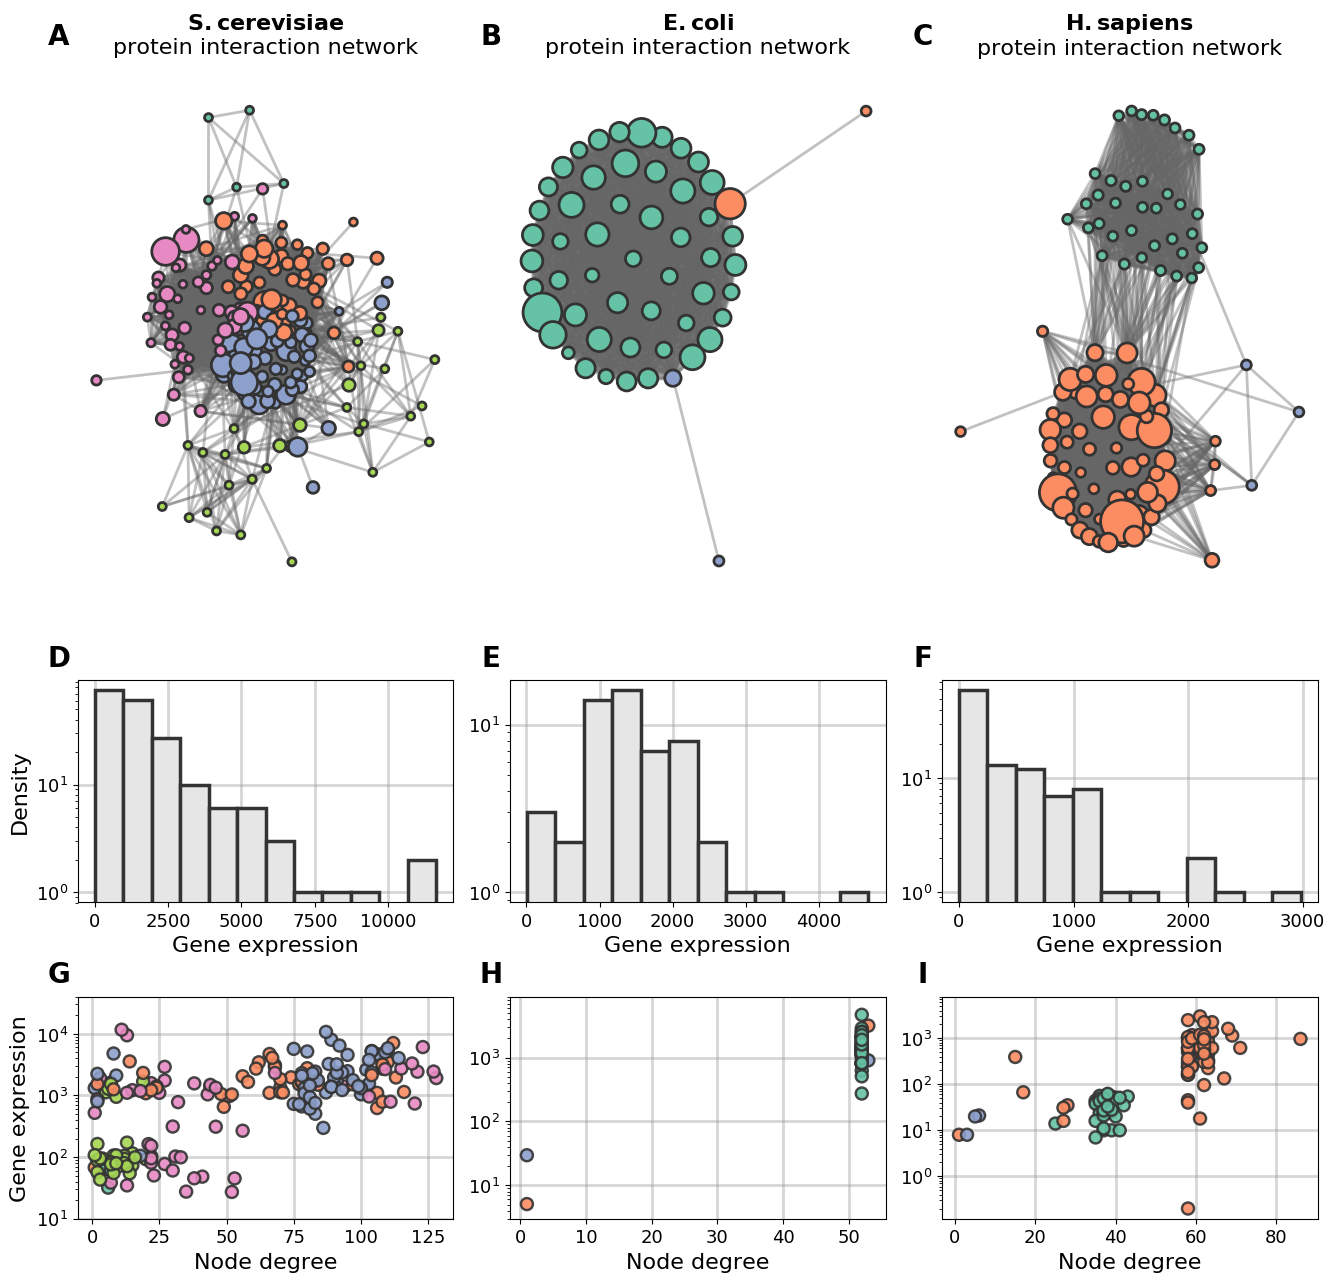

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(16,15), dpi=100,
                       gridspec_kw={'height_ratios':[2.25,1,1]})
plt.subplots_adjust(hspace=0.3, wspace=0.15)

# titles
title_yeast = r"$\bf{S. cerevisiae}$"+"\nprotein interaction network"
title_ecoli = r"$\bf{E. coli}$"+"\nprotein interaction network"
title_human = r"$\bf{H. sapiens}$"+"\nprotein interaction network"

# edgecolors and linewidths
mec = '#333333'
eec = '#666666' 
mlw = 2.0
elw = 2.0

# colormap
cmap1 = plt.cm.Set2
cmap2 = plt.cm.Set2
cmap3 = plt.cm.Set2

# color nodes based on community
partition_yeast = community.best_partition(G_yeast)
partition_ecoli = community.best_partition(G_ecoli)
partition_human = community.best_partition(G_human)
cols_yeast = cmap1(np.unique(list(partition_yeast.values())))
cols_ecoli = cmap2(np.unique(list(partition_ecoli.values())))
cols_human = cmap3(np.unique(list(partition_human.values())))
node_colors_yeast = [cols_yeast[com] for com in partition_yeast.values()]
node_colors_ecoli = [cols_ecoli[com] for com in partition_ecoli.values()]
node_colors_human = [cols_human[com] for com in partition_human.values()]

# node sizes
gene_ex_yeast = list(nx.get_node_attributes(G_yeast, 'gene_expression').values())
gene_ex_ecoli = list(nx.get_node_attributes(G_ecoli, 'gene_expression').values())
gene_ex_human = list(nx.get_node_attributes(G_human, 'gene_expression').values())
ns_yeast = softmax(0.7*np.log2(1000+np.array(gene_ex_yeast)))*16000
ns_ecoli = softmax(1.1*np.log2(1000+np.array(gene_ex_ecoli)))*12000
ns_human = softmax(1.5*np.log2(1000+np.array(gene_ex_human)))*13000

# degree sequences
deg_yeast = list(dict(G_yeast.degree()).values())
deg_ecoli = list(dict(G_ecoli.degree()).values())
deg_human = list(dict(G_human.degree()).values())

# network layouts
pos_yeast = nx.kamada_kawai_layout(G_yeast)
pos_ecoli = nx.kamada_kawai_layout(G_ecoli)
pos_human = nx.kamada_kawai_layout(G_human)

# draw networks
nx.draw_networkx_nodes(G_yeast, pos_yeast, node_color=node_colors_yeast,
           node_size=ns_yeast, edgecolors=mec, linewidths=mlw, ax=ax[(0,0)])
nx.draw_networkx_nodes(G_ecoli, pos_ecoli, node_color=node_colors_ecoli,
           node_size=ns_ecoli, edgecolors=mec, linewidths=mlw, ax=ax[(0,1)])
nx.draw_networkx_nodes(G_human, pos_human, node_color=node_colors_human,
           node_size=ns_human, edgecolors=mec, linewidths=mlw, ax=ax[(0,2)])
nx.draw_networkx_edges(G_yeast, pos_yeast, edge_color=eec,
                       width=elw, alpha=0.4, ax=ax[(0,0)])
nx.draw_networkx_edges(G_ecoli, pos_ecoli, edge_color=eec,
                       width=elw, alpha=0.4, ax=ax[(0,1)])
nx.draw_networkx_edges(G_human, pos_human, edge_color=eec,
                       width=elw, alpha=0.4, ax=ax[(0,2)])

# plot data
ax[(1,0)].hist(gene_ex_yeast, bins=12, edgecolor='.2', color='.9', linewidth=2.5)
ax[(1,1)].hist(gene_ex_ecoli, bins=12, edgecolor='.2', color='.9', linewidth=2.5)
ax[(1,2)].hist(gene_ex_human, bins=12, edgecolor='.2', color='.9', linewidth=2.5)
ax[(2,0)].scatter(deg_yeast, gene_ex_yeast, c=node_colors_yeast,
                  s=75, linewidths=1.75, edgecolors='.2', alpha=0.9)
ax[(2,1)].scatter(deg_ecoli, gene_ex_ecoli, c=node_colors_ecoli,
                  s=75, linewidths=1.75, edgecolors='.2', alpha=0.9)
ax[(2,2)].scatter(deg_human, gene_ex_human, c=node_colors_human,
                  s=75, linewidths=1.75, edgecolors='.2', alpha=0.9)

# nuance range
ax[(2,0)].set_ylim(1e1,4e4)
ax[(2,1)].set_ylim(3e0,9e3)
ax[(2,2)].set_ylim(1.2e-1,8e3)

# set titles
ax[(0,0)].set_title(title_yeast, fontsize=16, y=1.05)
ax[(0,1)].set_title(title_ecoli, fontsize=16, y=1.05)
ax[(0,2)].set_title(title_human, fontsize=16, y=1.05)

alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
for ai,a in enumerate(fig.axes):
    a.text(-0.05, 1.1, alphabet[ai], fontsize=20, horizontalalignment='center',
           verticalalignment='center', transform=a.transAxes, fontweight='bold')

    if ai==3:
        a.set_ylabel('Density', fontsize=16)
    if ai==6:
        a.set_ylabel('Gene expression', fontsize=16)

    if ai > 2:
        a.set_yscale('log')
        a.grid(linewidth=2, color='#999999', alpha=0.4)
        a.tick_params(axis='both', which='both', labelsize=13,
                      labelbottom=True, bottom=True, labelleft=True, left=True)
    
        if ai >= 6:
            a.set_xlabel('Node degree', fontsize=16)
        else:
            a.set_xlabel('Gene expression', fontsize=16)
    else:
        a.set_axis_off()

plt.savefig('../figs/pngs/ribosome_networks_with_gex_deg_data.png', dpi=425, bbox_inches='tight')
plt.savefig('../figs/pdfs/ribosome_networks_with_gex_deg_data.pdf', dpi=425, bbox_inches='tight')
plt.show()

________________

In [4]:
from presilience import *

In [15]:
def presilience(G, t=4, m=2, method='random', rate=100,
                ntimes=10, output_list=True, printt=True):
    """
    The 'presilience' is defined as the change in resilience (as calculated
    in Zitnik et al. (2019) using a modified Shannon entropy of the
    cluster size distribution in a network following uniform node removal)
    following the addition of a new node into the network. This new node
    may be added randomly, preferentially based on degree, or using
    insights about empirical distributions of protein-specific interaction
    patterns (named 'bio_smart', 'random', and 'degree').

    Parameters
    ----------
    G (nx.Graph):
        the protein-protein interaction network in question.

    t (int):
        the number of new nodes added (aka the number of timesteps) in the
        future that the presilience will be calculated.

    m (int):
        the number of edges that each new node brings to the network.

    method (str):
        the method of node-addition in question (can be either 'random'--adds
        node's edges randomly, 'degree'--adds edges preferentially based on
        degree, and 'bio_smart'-- which adds edges based on biological data).

    rate (int):
        the number of intervals between 0 and 1, which correspond to fractions
        of the network that are removed at each step.

    n_times (int):
        the number of runs that the algorithm goes through in order to arrive
        at the final (averaged) entropy value.

    output_list (bool):
        if True, returns list of resilience values. else return single number.

    Returns
    -------
    G (nx.Graph):
        the new graph with nodes added

    presilience (list or float):
        a list of resilience values or final resilience

    """

    Gx = G.copy()
    presilience = [resilience(Gx, ntimes, rate, output_list=False)]

    for new_node in range(t):
        if printt:
            print("\t", new_node)

        Gx = add_node(Gx, m, new_node, method)
        presilience.append(resilience(Gx, ntimes, rate, output_list=False))

    if output_list:
        return Gx, presilience
    else:
        return Gx, presilience[-1]


def presilience_mean(G, t=4, m=2, method='random', rate=40,
                     ntimes=10, output_list=True, n_iter=20, printt=True):
    """
    Runs the presilience algorithm several (n_iter) times.

    Parameters
    ----------
    G (nx.Graph):
        the protein-protein interaction network in question.

    t (int):
        the number of new nodes added (aka the number of timesteps) in the
        future that the presilience will be calculated.

    m (int):
        the number of edges that each new node brings to the network.

    method (str):
        the method of node-addition in question (can be either 'random'--adds
        node's edges randomly, 'degree'--adds edges preferentially based on
        degree, and 'bio_smart'-- which adds edges based on biological data).

    rate (int):
        the number of intervals between 0 and 1, which correspond to fractions
        of the network that are removed at each step.

    n_times (int):
        the number of runs that the algorithm goes through in order to arrive
        at the final (averaged) entropy value.

    output_list (bool):
        if True, returns list of resilience values. else, return single number.

    n_iter (int):
        number of iterations that go into creating the mean presilience.

    Returns
    -------
    presilience_mean (np.array):
        vector of resilience values of length t, averaged over n_iter times.

    """

    if output_list:
        pres = []
        for i in range(n_iter):
            if printt:
                print('\t', i)

            _, pres_i = presilience(G, t, m, method, rate, ntimes, output_list)
            pres.append(pres_i)

        pres = np.array(pres)
        presilience_mean = pres.mean(axis=0)

    else:
        pres = []
        for i in range(n_iter):
            if printt:
                print('\t', i)

            _, pres_i = presilience(G, t, m, method, rate, ntimes, output_list)
            pres.append(pres_i)

        pres = np.array(pres)
        presilience_mean = sum(pres) / len(pres)

    return presilience_mean


def modularience(G, t=4, m=2, method='random', output_list=True):
    """
    The 'modularience' is defined as the change in modularity of the
    community-detected partition following the following the
    addition of a new node into the network. This new node may be
    added randomly, preferentially based on degree, or using insights
    about empirical distributions of protein-specific interaction
    patterns (named 'bio_smart', 'random', and 'degree').

    Parameters
    ----------
    G (nx.Graph):
        the protein-protein interaction network in question.

    t (int):
        the number of new nodes added (aka the number of timesteps) in the
        future that the presilience will be calculated.

    m (int):
        the number of edges that each new node brings to the network.

    method (str):
        the method of node-addition in question (can be either 'random'--adds
        node's edges randomly, 'degree'--adds edges preferentially based on
        degree, and 'bio_smart'-- which adds edges based on biological data).

    output_list (bool):
        if True, returns list of resilience values. else return single number.

    Returns
    -------
    G (nx.Graph):
        the new graph with nodes added.

    modularience (list or float):
        a list of modularity values or final modularity.

    """

    Gx = G.copy()
    partition = community.best_partition(Gx)
    modularit = [community.modularity(partition,Gx)]

    for new_node in range(t):
        Gx = add_node(Gx, m, str(new_node), method)
        partition = community.best_partition(Gx)
        modularit.append(community.modularity(partition, Gx))

    if output_list:
        return Gx, modularit
    else:
        return Gx, modularit[-1]


def modularience_mean(G, t=4, m=2, method='random',
                      output_list=True, n_iter=20, printt=True):
    """
    Runs the modularience algorithm several (n_iter) times.

    Parameters
    ----------
    G (nx.Graph):
        the protein-protein interaction network in question.

    t (int):
        the number of new nodes added (aka the number of timesteps) in the
        future that the presilience will be calculated.

    m (int):
        the number of edges that each new node brings to the network.

    method (str):
        the method of node-addition in question (can be either 'random'--adds
        node's edges randomly, 'degree'--adds edges preferentially based on
        degree, and 'bio_smart'-- which adds edges based on biological data).

    output_list (bool):
        if True, returns list of resilience values. else return single number.

    Returns
    -------
    comm_mean (np.array):
        vector of modularity values of length t, averaged over n_iter times.

    """

    if output_list:
        comm = []
        for i in range(n_iter):
            if printt:
                print('\t', i)

            _, comm_i = comm_presilience(G, t, m, method, output_list)
            comm.append(comm_i)

        comm = np.array(comm)
        comm_mean = comm.mean(axis=0)

    else:
        comm = []
        for i in range(n_iter):
            if printt:
                print('\t', i)

            _, comm_i = comm_presilience(G, t, m, method, output_list)
            comm.append(comm_i)

        comm = np.array(comm)
        comm_mean = sum(comm) / len(comm)

    return comm_mean


def gene_expression_shuffle(G, p_permute):
    """
    Shuffles p_permute of the gene expression values. Each node in G
    should have a node attribute that corresponds to the gene expression
    of that protein. If we want to ask what the effect of *mere* values
    associated with each node (or the distribution of those values),
    this function becomes especially useful.

    Parameters
    ----------
    G (nx.Graph):
        the protein-protein interaction network in question.

    p_permute (float):
        the fraction of nodes in the network whose gene expression values
        will be shuffled among one another.

    Returns
    -------
    H (nx.Graph):
        the modified graph with new (shuffled) gene expression values.

    """

    gene_expression = nx.get_node_attributes(G, 'gene_expression')
    
    # permute the gene expression values among n nodes
    n_permute = int(p_permute * G.number_of_nodes())
    permutate_nodes = np.random.choice(list(G.nodes()), replace=False,
                                       size=n_permute)

    gene_expression_values = [gene_expression.get(i) for i in permutate_nodes]

    gene_expression_out = gene_expression.copy()
    np.random.shuffle(gene_expression_values)

    for p_i, perm in enumerate(permutate_nodes):
        gene_expression_out[perm] = gene_expression_values[p_i]

    H = G.copy()
    nx.set_node_attributes(H, gene_expression_out, 'gene_expression')

    return H



In [17]:
niter = 4
t_out = 20
r_out = 30
ms = [4,8,16]
graph_dict = {'G_yeast':G_yeast, 'G_ecoli':G_ecoli, 'G_human':G_human}

out_dict = {'G_yeast':{m_i:[] for m_i in ms},
            'G_ecoli':{m_i:[] for m_i in ms},
            'G_human':{m_i:[] for m_i in ms}}

for Gname in out_dict.keys():
    Gx = graph_dict[Gname]
    for m_i in ms:
        print(Gname, m_i, dt.datetime.now())
        p_i = presilience(G_ecoli, t=t_out, m=m_i, ntimes=niter, rate=r_out)
        out_dict[Gname][m_i] = p_i

G_yeast 4 2020-03-10 08:15:49.386448
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
G_yeast 8 2020-03-10 08:24:38.151074
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
G_yeast 16 2020-03-10 08:33:41.067930
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
G_ecoli 4 2020-03-10 08:42:49.671187
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
G_ecoli 8 2020-03-10 08:51:31.992351
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
G_ecoli 16 2020-03-10 09:00:16.235308
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
G_human 4 2020-03-10 09:09:55.467318
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
G_human 8 2020-03-10 09:18:52.696129
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 

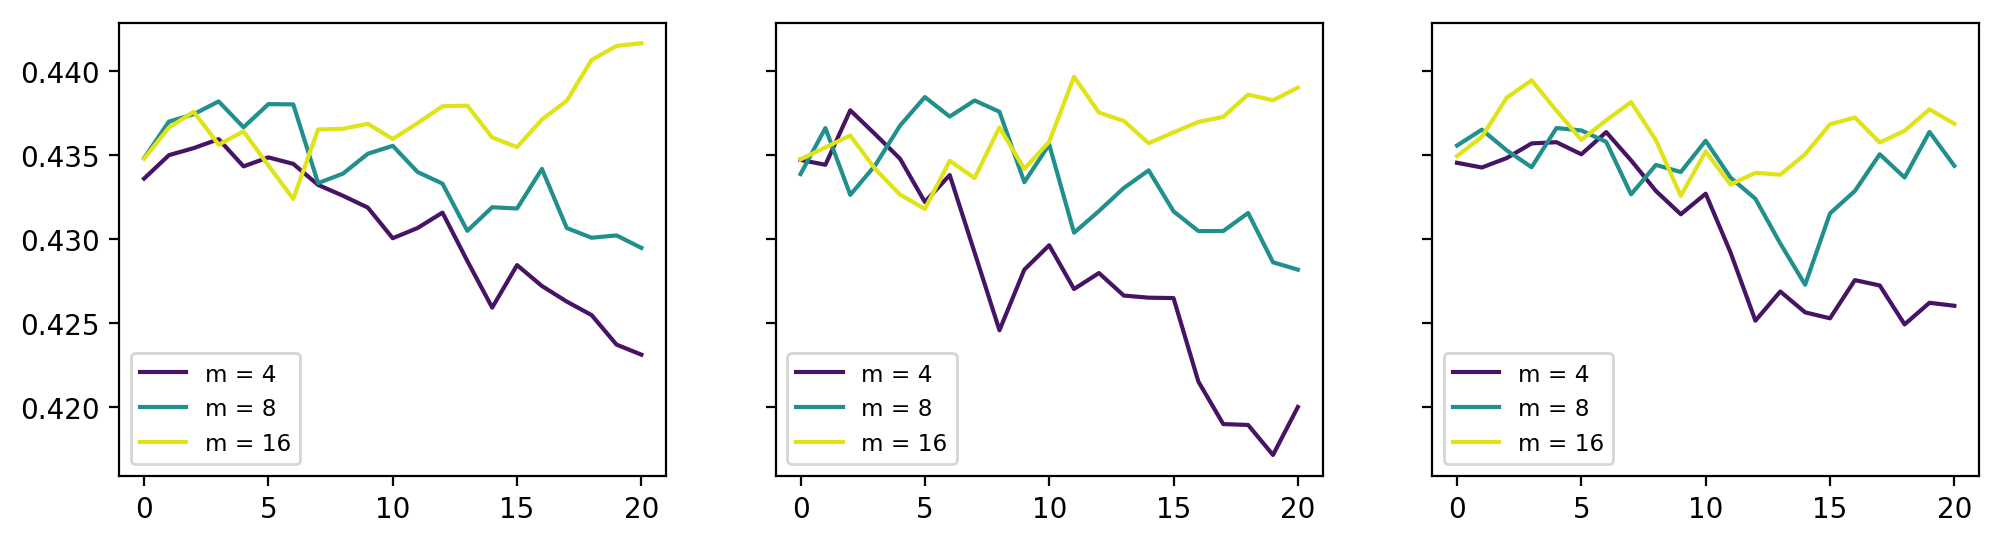

In [29]:
axes = {'G_yeast':0, 'G_ecoli':1, 'G_human':2}
cols = plt.cm.viridis(np.linspace(0.05,0.95,len(ms)))
cols = dict(zip(ms,cols))
fig, ax = plt.subplots(1,3,dpi=200,figsize=(12,3), sharey=True)

for Gname, m_data in out_dict.items():
    a = axes[Gname]
    for m_i in m_data.keys():
        ax[a].plot(range(t_out+1), m_data[m_i][1], color=cols[m_i], label='m = %i'%m_i)

    ax[a].legend(fontsize='small')
plt.show()

In [30]:
def findFilesInFolder(path, pathList, extension, subFolders=True):
    """  
    Recursive function to find all files of an extension type in a 
    folder (and optionally in all subfolders too)

    path:        Base directory to find files
    pathList:    A list that stores all paths
    extension:   File extension to find
    subFolders:  Bool.  If True, find files in all subfolders under path. 
                 If False, only searches files in the specified folder
    """

    try:   # Trapping a OSError:  File permissions problem I believe
        for entry in os.scandir(path):
            if entry.is_file() and entry.path.endswith(extension):
                pathList.append(entry.path)
            elif entry.is_dir() and subFolders:   # if its a directory, then repeat process as a nested function
                pathList = findFilesInFolder(entry.path, pathList, extension, subFolders)
    except OSError:
        print('Cannot access ' + path +'. Probably a permissions error')

    return pathList

In [64]:
import json
import numpy as np
import os

dir_name = '../../cluster/out/'
extension = ".json"
pathList = []
pathList = findFilesInFolder(dir_name, pathList, extension, True)
pathList = sorted(pathList)

In [65]:
species = ['sce', 'eco', 'hsa']
links_per_nodes = [4, 8, 16]
methods_used = ['bio_smart', 'degree', 'random']
values_measured = ['pres', 'comm']
noise_interval = np.linspace(0.0, 1.0, 11).round(2)

out_dict = {spec:
            {m:
             {meth:
              {val:
               {nois: [] for nois in noise_interval
               } for val in values_measured
              } for meth in methods_used
             } for m in links_per_nodes
            } for spec in species}

In [66]:
for i in range(len(pathList)):
    with open(pathList[i]) as loadf:
        new_data = json.load(loadf)

    spec = list(new_data.keys())[0]
    m_str = list(new_data[spec].keys())[0]
    meth = list(new_data[spec][m_str].keys())[0]
    
    for valtype in values_measured:
        for noise_val, vals in new_data[spec][m_str][meth][valtype].items():
                out_dict[spec][int(m_str)][meth][valtype][float(noise_val)].append(vals)

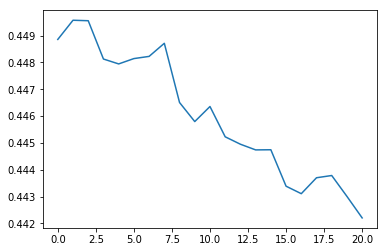

In [68]:
plt.plot(np.array(out_dict[spec][int(m_str)][meth]['pres'][0.0]).mean(axis=0))
# plt.plot(np.array(out_dict[spec][int(m_str)][meth]['comm'][0.0]).mean(axis=0))